python3 --version
python3 -m venv venv
source venv/bin/activate

In [33]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns 
import textwrap
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("FaBrand.csv")

In [3]:
df.head()

,Unnamed: 0,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
df.shape

(500, 20)

In [5]:
df.columns

Index(['Unnamed: 0', 'Page total likes', 'Type', 'Category', 'Post Month',
       'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [6]:
type_and_interactions = df.groupby("Type")["Total Interactions"].mean().reset_index()
print(type_and_interactions)

     Type  Total Interactions
0    Link           89.045455
1   Photo          216.579812
2  Status          217.044444
3   Video          295.857143


/var/folders/2n/qrgz_m713w50gxs_lfr8mq400000gn/T/ipykernel_23854/3652958827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_and_interactions, x="Type" , y="Total Interactions", palette="magma")


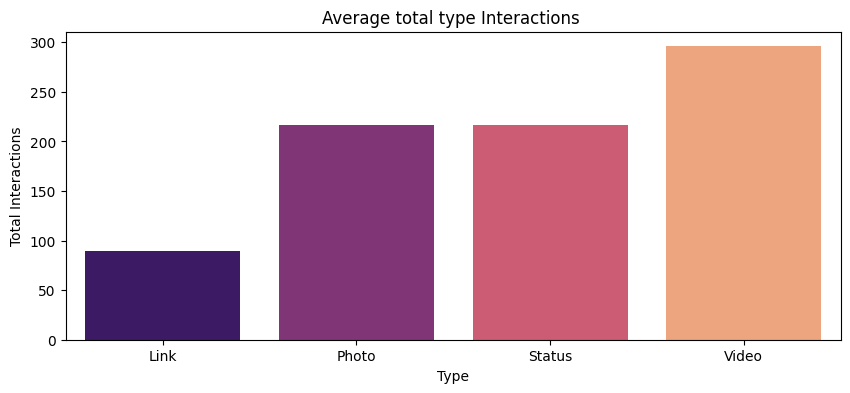

In [7]:
plt.figure(figsize=(10,4))
sns.barplot(data=type_and_interactions, x="Type" , y="Total Interactions", palette="magma")
plt.title("Average total type Interactions ")
plt.show()

In [8]:
# влияние месяца после публикации на общий охват
# Lifetime Post Total Reach / Post Month

totalpost_postmonth = df.groupby("Post Month")['Lifetime Post Total Reach'].mean().reset_index()
print(totalpost_postmonth)

month_names = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 
               'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']

totalpost_postmonth["names_month"]=totalpost_postmonth["Post Month"].apply(lambda x: month_names [x-1] if 1<=x<=12 else "mesayc")


    Post Month  Lifetime Post Total Reach
0            1               12355.920000
1            2               23643.307692
2            3               13187.138889
3            4               18655.200000
4            5               10680.216216
5            6               16730.387755
6            7               19569.884615
7            8               12082.147059
8            9                7849.694444
9           10                9864.750000
10          11               13653.622222
11          12                9765.760000


/var/folders/2n/qrgz_m713w50gxs_lfr8mq400000gn/T/ipykernel_23854/405842668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=totalpost_postmonth, x="Post Month" , y="Lifetime Post Total Reach", palette="magma")


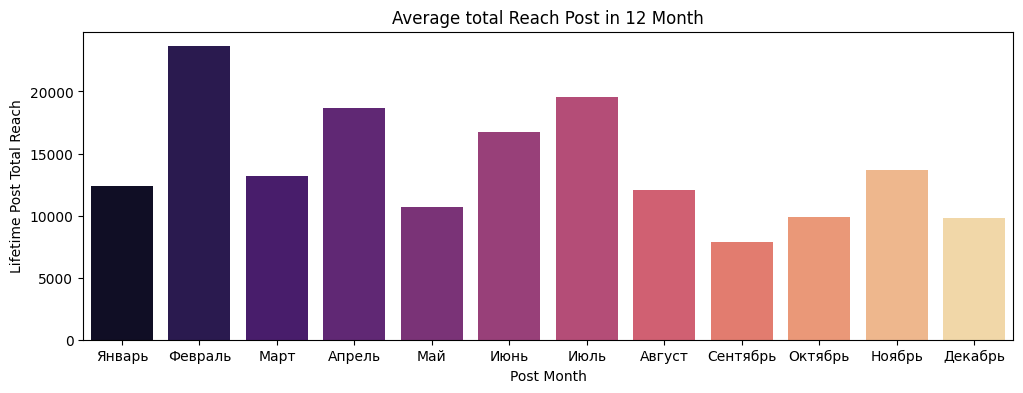

In [9]:
plt.figure(figsize=(12,4))
sns.barplot(data=totalpost_postmonth, x="Post Month" , y="Lifetime Post Total Reach", palette="magma")
plt.title("Average total Reach Post in 12 Month")
plt.xticks(ticks=totalpost_postmonth.index, labels=totalpost_postmonth["names_month"])
plt.show()

In [10]:
weekpost = df.groupby("Post Weekday")['Lifetime Post Total Reach'].mean().reset_index()
print(weekpost)

   Post Weekday  Lifetime Post Total Reach
0             1               12123.014706
1             2               16627.409091
2             3               17229.859375
3             4               15396.708333
4             5               12940.089552
5             6               13139.530864
6             7               10821.268293


/var/folders/2n/qrgz_m713w50gxs_lfr8mq400000gn/T/ipykernel_23854/2419755613.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekpost, x="Post Weekday" , y="Lifetime Post Total Reach", palette="magma")


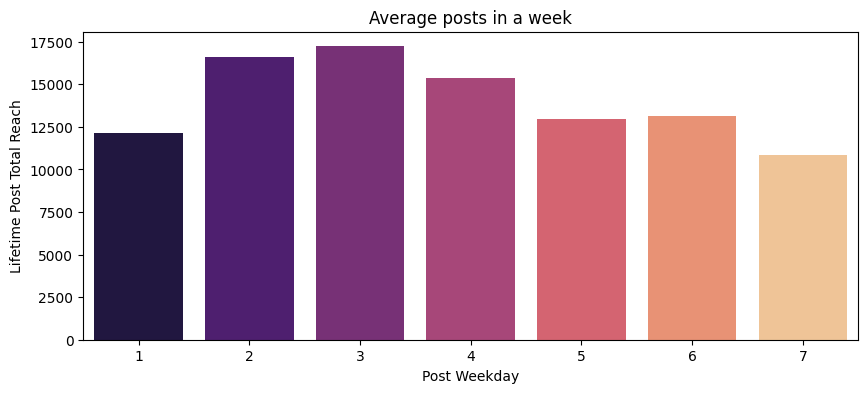

In [11]:
plt.figure(figsize=(10,4))
sns.barplot(data=weekpost, x="Post Weekday" , y="Lifetime Post Total Reach", palette="magma")
plt.title("Average posts in a week")
plt.show()

In [12]:
postshour  = df.groupby("Post Hour")['Lifetime Post Total Reach'].mean().reset_index()
print(postshour) 

    Post Hour  Lifetime Post Total Reach
0           1                3617.750000
1           2               15994.692308
2           3               13640.161905
3           4               12360.542857
4           5               24400.384615
5           6               16134.875000
6           7               12695.307692
7           8                3216.833333
8           9                7369.200000
9          10               15755.423077
10         11                8128.886364
11         12               15224.931034
12         13               19268.596154
13         14               24157.769231
14         15                6022.000000
15         16                5754.000000
16         17                7572.000000
17         18                3383.000000
18         19                 238.000000
19         20                5994.000000
20         22               20560.000000
21         23                2822.000000


/var/folders/2n/qrgz_m713w50gxs_lfr8mq400000gn/T/ipykernel_23854/2486704592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=postshour, x="Post Hour" , y="Lifetime Post Total Reach", palette="magma" )


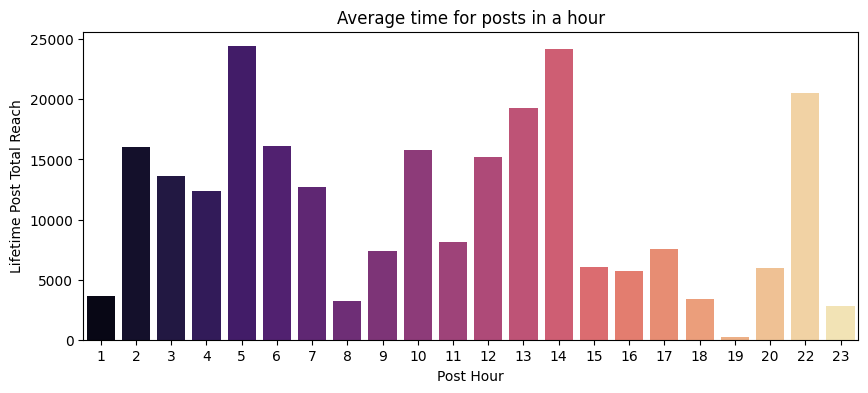

In [13]:
plt.figure(figsize=(10,4))
sns.barplot(data=postshour, x="Post Hour" , y="Lifetime Post Total Reach", palette="magma" )
plt.title("Average time for posts in a hour")
plt.show()

In [14]:
paidby_interections = df.groupby("Paid")['Total Interactions'].mean().reset_index()
print(paidby_interections) 

   Paid  Total Interactions
0   0.0          186.852778
1   1.0          278.230216


/var/folders/2n/qrgz_m713w50gxs_lfr8mq400000gn/T/ipykernel_23854/2471734821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=paidby_interections, x="Paid" , y="Total Interactions", palette="magma" )


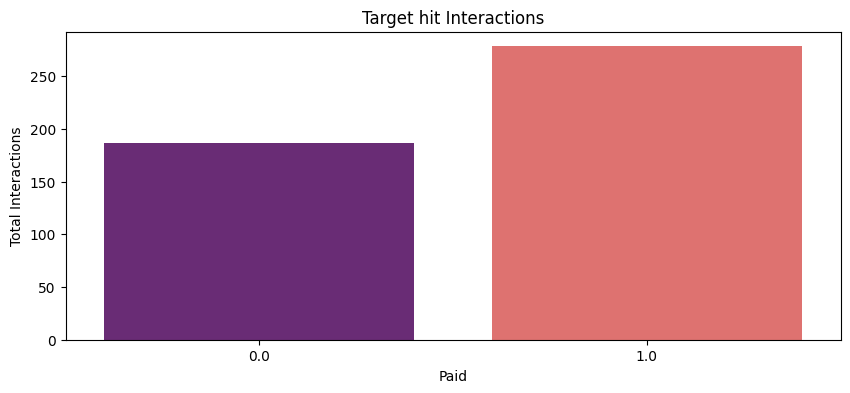

In [15]:
plt.figure(figsize=(10,4))
sns.barplot(data=paidby_interections, x="Paid" , y="Total Interactions", palette="magma" )
plt.title("Target hit Interactions")
plt.show()

In [16]:
correlation , pvalue = pearsonr(df["Page total likes"], df["Lifetime Post Total Reach"])
print(correlation)
print(pvalue)
# P-значение, или значение вероятности, это статистическая величина, выраженная числом от 0 до 1 ,  нам достаточно от 0.05


-0.0832445619340686
0.06288900039367352


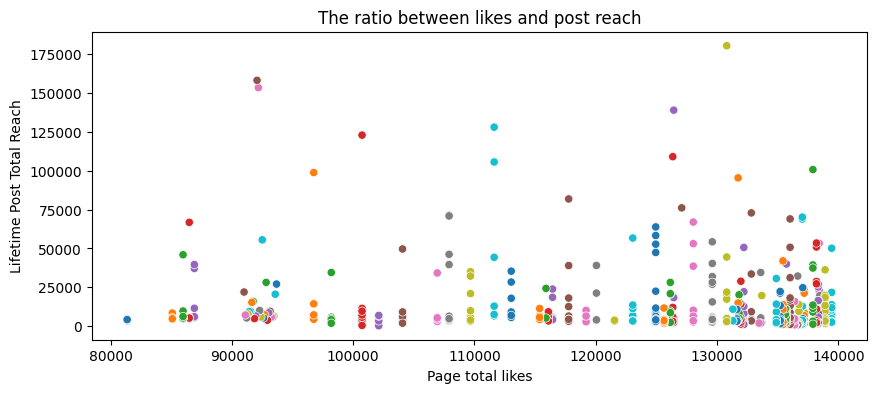

In [17]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x="Page total likes" , y="Lifetime Post Total Reach", hue="Page total likes", palette="tab10", legend=False)
plt.title("The ratio between likes and post reach")
plt.show()

Матрицу карелляции посмотреть самостоятельно 

In [23]:
number_columns = df.select_dtypes(include=['number',"float"]).columns
carilation_matrix = df[number_columns].corr()
print(carilation_matrix)



                                                    Unnamed: 0  \
Unnamed: 0                                            1.000000   
Page total likes                                     -0.929160   
Category                                              0.128540   
Post Month                                           -0.994327   
Post Weekday                                         -0.015795   
Post Hour                                             0.171231   
Paid                                                  0.022841   
Lifetime Post Total Reach                             0.099380   
Lifetime Post Total Impressions                       0.097680   
Lifetime Engaged Users                                0.116807   
Lifetime Post Consumers                               0.149715   
Lifetime Post Consumptions                            0.147139   
Lifetime Post Impressions by people who have li...    0.088773   
Lifetime Post reach by people who like your Page      0.086048   
Lifetime P

In [ ]:
def wrap_labels(labels, width=20):
    return ['\n'.join(textwrap.wrap(label, width=width)) for label in labels]

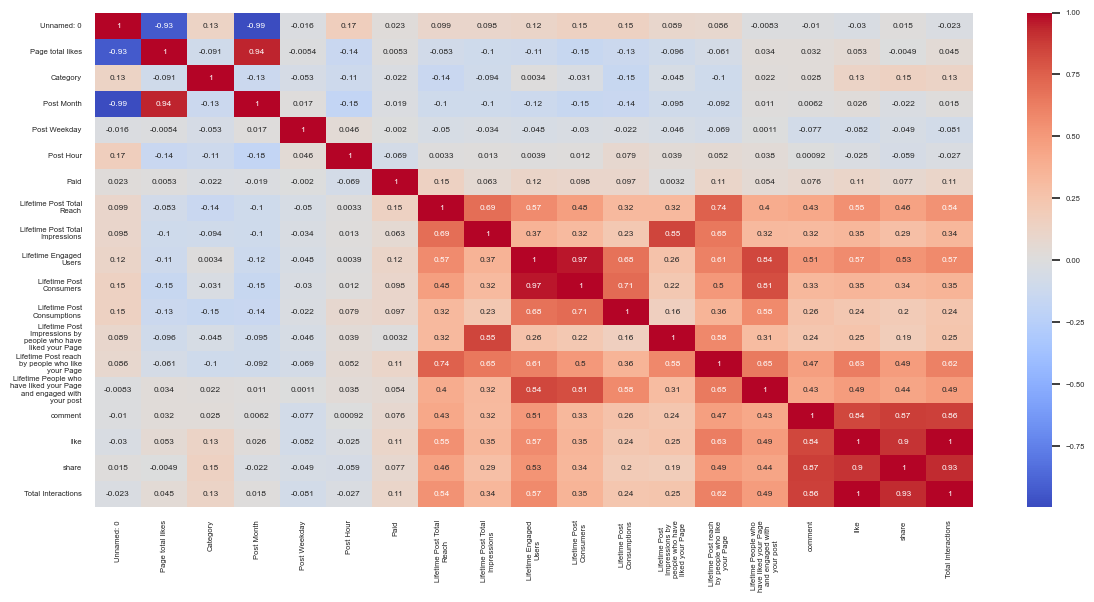

In [45]:
wrap = wrap_labels(number_columns)

plt.figure(figsize=(12,6))
sns.heatmap(carilation_matrix , cmap="coolwarm", annot=True, xticklabels=wrap, yticklabels=wrap)
plt.tight_layout()
# wrap(0.8, 0.8, "First line of text", horizontalalignment='center', verticalalignment='center', transform=wrap.transAxes, fontsize=12)
# plt.xticks(rotation=45)
# plt.yticks(rotation=45)
plt.title("")
plt.show()

/var/folders/2n/qrgz_m713w50gxs_lfr8mq400000gn/T/ipykernel_23854/1934056015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Type" , y="Lifetime Engaged Users", palette="magma")


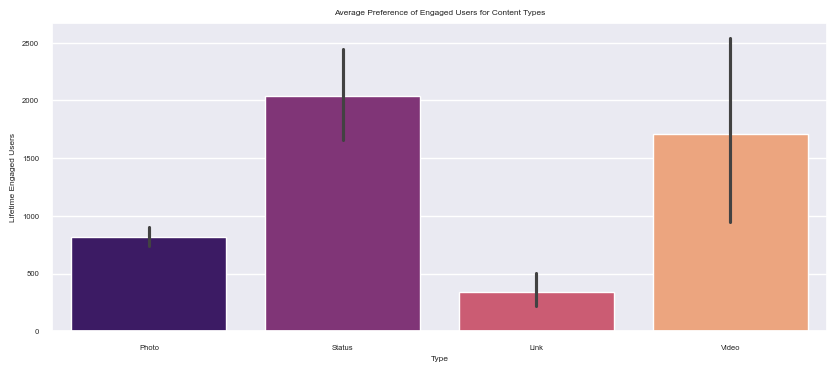

In [46]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="Type" , y="Lifetime Engaged Users", palette="magma")
plt.title("Average Preference of Engaged Users for Content Types")
plt.show()

/var/folders/2n/qrgz_m713w50gxs_lfr8mq400000gn/T/ipykernel_23854/2089380872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Post Weekday" , y="Lifetime Engaged Users", palette="magma")


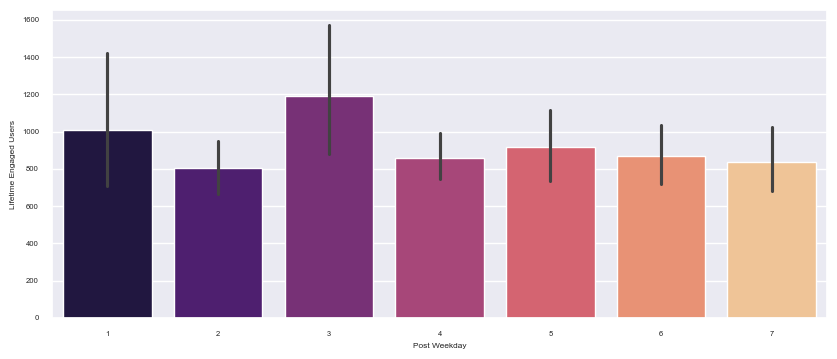

In [47]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="Post Weekday" , y="Lifetime Engaged Users", palette="magma")
plt.title("")
plt.show()

/var/folders/2n/qrgz_m713w50gxs_lfr8mq400000gn/T/ipykernel_23854/4223431248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Post Month" , y="Lifetime Engaged Users", palette="magma")


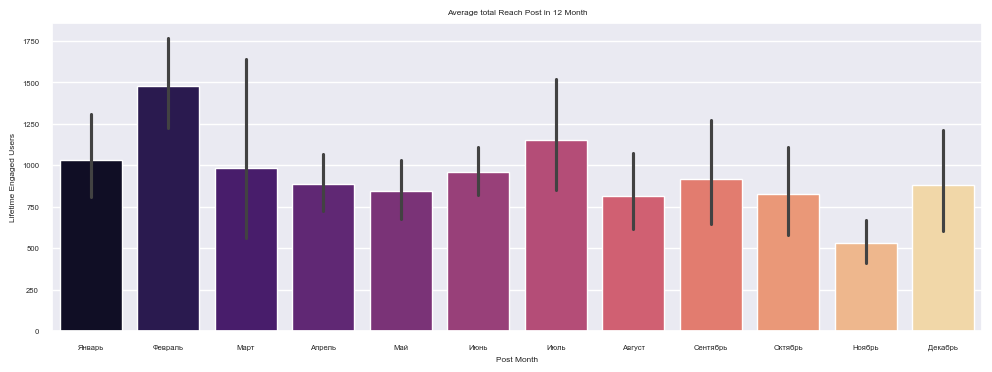

In [ ]:
plt.figure(figsize=(14,4))
sns.barplot(data=df, x="Post Month" , y="Lifetime Engaged Users", palette="magma")
plt.title("Average total Reach Post in 12 Month")
plt.xticks(ticks=totalpost_postmonth.index, labels=totalpost_postmonth["names_month"])
plt.show()